<a href="https://colab.research.google.com/github/sime1/notebooks/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

In questo notebook provo ad cercare di capire che influenza hanno dimensioni del
dataset e rumore sulla varianza dei risultati ottenuti da Ridge Regression
cambiando il valore di alfa.

Per generare diversi dataset con le caratteristiche necessarie a questa
valutazione ho utilizzato la funzione `sklearn.datasets.make_regression` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)).

Ho tenuto in considerazione solo il modello con polinomio di grado 1. Come ho
osservato in [questo altro notebook](https://colab.research.google.com/github/sime1/notebooks/blob/master/polynomial_ridge.ipynb), più aumenta il grado del
polinomio più influenza ha alfa sul modello.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 0.4, 20)

## Numero di sample

Fissato il valore di `noise` a  `1`, ho osservato come 
la varianza dell'errore cambi al variare del numero di sample

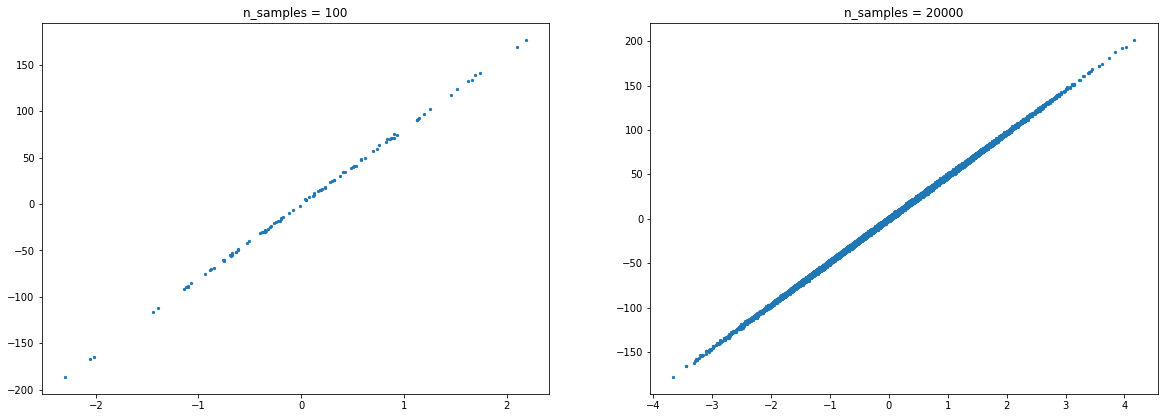

In [0]:
plt.figure(figsize=(20, 15))

x,y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=1.0, random_state=1)
ax = plt.subplot(221)
plt.scatter(x,y,marker='.',s=20)
ax.set_title("n_samples = 100")

x,y = make_regression(n_samples=20000, n_features=1, n_informative=1, noise=1.0, random_state=1)
ax = plt.subplot(222)
plt.scatter(x,y,marker='.',s=20)
ax.set_title("n_samples = 20000")
plt.show()


I due grafici mostrano il dataset generato per i due valori estremi di `n_samples`

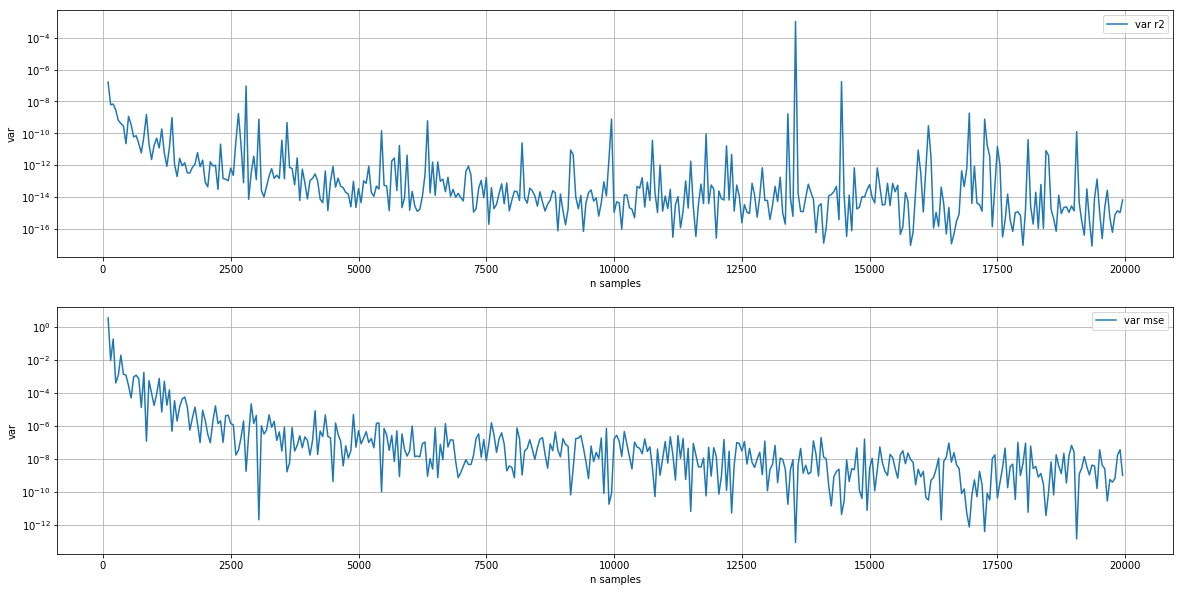

,n,var r2,var mse
0,100,1.596753e-07,3.459716e+00
1,150,6.129627e-09,9.176507e-03
2,200,6.747520e-09,1.825562e-01
3,250,2.793840e-09,4.010118e-04
4,300,6.381894e-10,1.193136e-03
5,350,4.057214e-10,1.924479e-02
6,400,2.808931e-10,1.365021e-03
7,450,2.180285e-11,1.198179e-03
8,500,1.143872e-09,2.757282e-04
9,550,3.446743e-10,4.954480e-05


In [0]:
results = []
r_columns = ["samples","alpha", "coeff", "mse", "r2"]

n_samples = range(100, 20000, 50)

for n in n_samples:
  x,y = make_regression(n_samples=n, n_features=1, n_informative=1, noise=1.0, random_state=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
  for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    mse = mean_squared_error(y_predict, y_test)
    r2 = r2_score(y_predict, y_test)
    results.append((n, alpha, model.coef_, mse, r2))

df = pd.DataFrame(data=results, columns=r_columns)

aggr_data = []

aggr_data = ((n, np.var(df[df.samples==n]["r2"]), np.var(df[df.samples==n]["mse"])) for n in n_samples )

aggr = pd.DataFrame(data=aggr_data,columns=["n","var r2", "var mse"])

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(211)
plt.xlabel("n samples")
plt.ylabel("var")
plt.yscale("log")
plt.grid(True)
plt.plot(aggr["n"], aggr["var r2"])
ax2 = plt.subplot(212)
plt.xlabel("n samples")
plt.ylabel("var")
plt.yscale("log")
plt.grid(True)
plt.plot(aggr["n"], aggr["var mse"])

ax1.legend()
ax2.legend()

plt.show()

display(aggr)

I grafici sembrano evidenziare che all'aumentare del numero dei sample la varianza tende a diminuire; tuttavia questa diminuzione è quasi impercettibile.

Si noti che la scala dell'asse `y` è logaritmica

## Noise

Fissato il numero di sample generati a `500`, ho osservato come la varianza di
alfa cambia al variare del noise


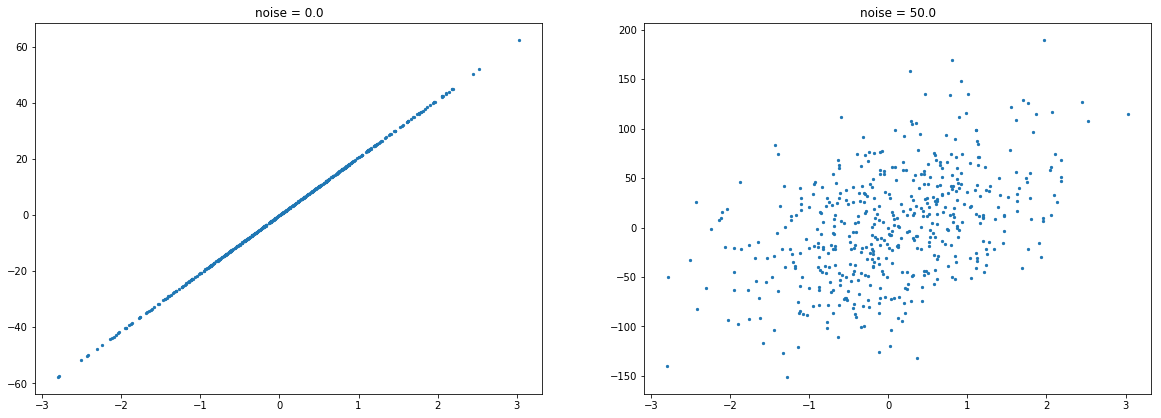

In [0]:
plt.figure(figsize=(20, 15))

x,y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=0.0, random_state=1)
ax = plt.subplot(221)
plt.scatter(x,y,marker='.',s=20)
ax.set_title("noise = 0.0")

x,y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=50.0, random_state=1)
ax = plt.subplot(222)
plt.scatter(x,y,marker='.',s=20)
ax.set_title("noise = 50.0")
plt.show()


I due grafici mostrano in che modo il valore di noise influisce sui dati
generati.

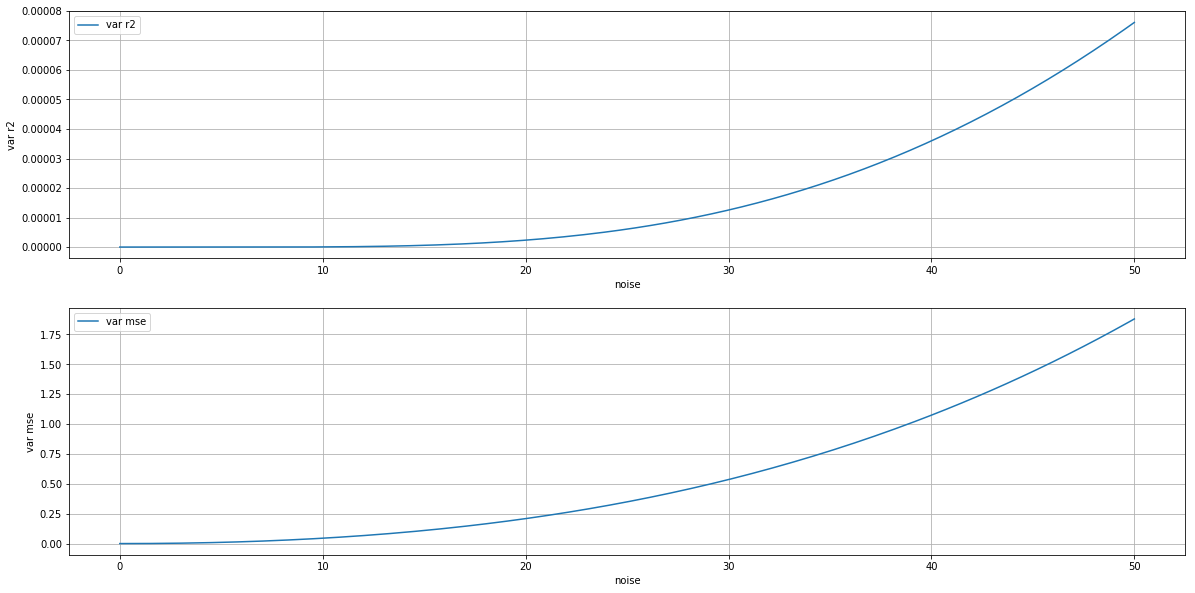

,noise,var r2,var mse
0,0.000000,9.677141e-11,0.000020
1,0.251256,1.772401e-11,0.000003
2,0.502513,2.143515e-10,0.000043
3,0.753769,6.145526e-10,0.000135
4,1.005025,1.155706e-09,0.000279
5,1.256281,1.782261e-09,0.000476
6,1.507538,2.445507e-09,0.000727
7,1.758794,3.103339e-09,0.001031
8,2.010050,3.720042e-09,0.001391
9,2.261307,4.266071e-09,0.001805


In [0]:
noises = np.linspace(0, 50, 200)

results = []
r_columns = ["noise","alpha", "coeff", "mse", "r2"]

for noise in noises:
  x,y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=noise, random_state=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
  for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    mse = mean_squared_error(y_predict, y_test)
    r2 = r2_score(y_predict, y_test)
    results.append((noise, alpha, model.coef_, mse, r2))

df = pd.DataFrame(data=results, columns=r_columns)

aggr_data = ((n, np.var(df[df.noise==n]["r2"]), np.var(df[df.noise==n]["mse"])) for n in noises)

aggr = pd.DataFrame(data=aggr_data,columns=["noise", "var r2", "var mse"])

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(211)
plt.xlabel("noise")
plt.ylabel("var r2")
plt.grid(True)
#plt.plot(aggr["noise"], aggr["delta r2"])
plt.plot(aggr["noise"], aggr["var r2"])
ax2 = plt.subplot(212)
plt.xlabel("noise")
plt.ylabel("var mse")
plt.grid(True)
#plt.plot(aggr["noise"], aggr["delta mse"])
plt.plot(aggr["noise"], aggr["var mse"])

ax1.legend()
ax2.legend()

plt.show()

display(aggr)

Da questi grafici si nota invece che sembra esistere un legame tra il noise e la varianza 

## Conclusioni

Dai dati ottenuti si può concludere che per Ridge Regression con polinomio di grado 1, il valore di alfa influenza il valore dell'errore in modo proporzionale al rumore presente nei dati. La quantità di dati disponibili, superata una certa soglia, non influisce in maniera significativa.

Intuitivamente questo significa che tanto più i dati sono vicini tra loro, tanto
meno perso avrà il valore di alfa sul modello allenato.

Da notare che sono stati presi in considerazione solamente dati con
una singola feature; potrebbe essere interessante valutare l'influenza che ha il numero di features. Potrebbe essere interessante anche verificare cosa
succede cambiando la funzione utilizzata per generare il dataset, usando ad
esempio `make_friedman1`.